In [15]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
pd.set_option('display.max_columns',None)

In [148]:
products = pd.read_csv('amazon_baby_subset.csv', index_col=None)

In [149]:
important_words = pd.read_json('important_words.json')

In [150]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53072 entries, 0 to 53071
Data columns (total 4 columns):
name         52982 non-null object
review       52831 non-null object
rating       53072 non-null int64
sentiment    53072 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [151]:
products.describe()

,rating,sentiment
count,53072.000000,53072.000000
mean,3.097490,0.001620
std,1.730509,1.000008
min,1.000000,-1.000000
25%,1.000000,-1.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [152]:
len(products[products.sentiment == -1])

26493

In [153]:
len(products[products.sentiment == 1])

26579

In [154]:
len(products[products.review.isnull()])

241

In [155]:
products = products.fillna({'review':''})

In [156]:
len(products[products.review.isnull()])

0

In [157]:
def remove_punctutation(text):
    return text.translate(None, string.punctuation)

In [158]:
products['review_clean'] = products['review'].apply(remove_punctutation)

In [159]:
products.ix[0,'review_clean']

'All of my kids have cried nonstop when I tried to ween them off their pacifier until I found Thumbuddy To Loves Binky Fairy Puppet  It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from itThis is a must buy book and a great gift for expecting parents  You will save them soo many headachesThanks for this book  You all rock'

In [160]:
def create_important_word_feature(data, feature_column, important_words):
    for words in important_words:
        data[words] = data[feature_column].apply(lambda s: s.split(' ').count(words))
    return data

In [59]:
products = create_important_word_feature(products,'review_clean', important_words[0].values)

In [63]:
products.head(1)

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,two,using,got,fit,around,diaper,enough,month,price,go,could,soft,since,buy,room,works,made,child,keep,size,small,need,year,big,make,take,easily,think,crib,clean,way,quality,thing,better,without,set,new,every,cute,best,bottles,work,purchased,right,lot,side,happy,comfortable,toy,able,kids,bit,night,long,fits,see,us,another,play,day,money,monitor,tried,thought,never,item,hard,plastic,however,disappointed,reviews,something,going,pump,bottle,cup,waste,return,amazon,different,top,want,problem,know,water,try,received,sure,times,chair,find,hold,gate,open,bottom,away,actually,cheap,worked,getting,ordered,came,milk,bad,part,worth,found,cover,many,design,looking,weeks,say,wanted,look,place,purchase,looks,second,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
products[products.perfect >=1].shape

(2955, 198)

In [88]:
def create_feature_matrix(data, feature_columns, label_columns):
    intercept_feature = np.ones(products.shape[0])
    feature = data[feature_columns]
    feature = np.column_stack((intercept_feature, feature))
    return feature, data[label_columns].as_matrix()

In [89]:
feature, label = create_feature_matrix(products, important_words[0].values, 'sentiment')

In [90]:
feature.shape

(53072, 194)

In [91]:
feature

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [99]:
def predict_probability(feature_matrix, coefficients):
    return 1/(1 + np.exp(-feature_matrix.dot(coefficients.T)))
    

In [98]:
a = [1,2]
1/(1+np.exp(a))

array([ 0.26894142,  0.11920292])

In [100]:
def feature_derivative(errors, features):
    return (errors.T).dot(features.T)

In [109]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    indicator = (sentiment == 1)
    scores = feature_matrix.dot(coefficients.T)
    ll = (indicator - 1)*scores - np.log(1 + np.exp(-scores))
    return np.sum(ll)

In [183]:
def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):
    coefficients = np.array(initial_coefficients)
    indicator = (sentiment == 1)
    ll =[]
    for i in range(max_iter):
    
        prediction = predict_probability(feature_matrix, coefficients)
        grad = (feature_matrix.T.dot((indicator - prediction).T)).T
        coefficients += step_size*grad
        ll.append(compute_log_likelihood(feature_matrix, sentiment, coefficients))
#         if i % 10 == 0:
#             print compute_log_likelihood(feature_matrix, sentiment, coefficients)
    return coefficients, ll
        

In [184]:
initial_coefficients = np.zeros(len(important_words)+1)
step_size = 1e-7
max_iter = 1000

In [185]:
coefficients, ll = logistic_regression(feature, label, initial_coefficients, step_size, max_iter)

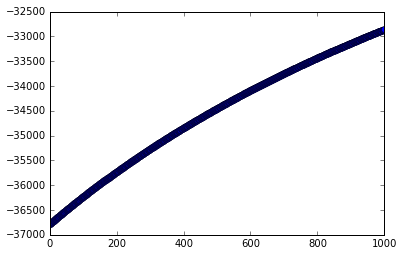

In [186]:
plt.plot(ll, 'bo')

In [141]:
def predict_class(feature_matrix, coefficients):
    score = pd.DataFrame({"Score":feature_matrix.dot(coefficients.T)})
    score['predicted_sentiment'] = np.where(score.Score >0,1,-1)
                          
    
    return score

In [142]:
prediction = predict_class(feature, coefficients)

In [143]:
prediction.shape

(53072, 2)

In [145]:
prediction[prediction.predicted_sentiment ==1].shape

(25126, 2)

In [161]:
products = pd.concat([products, prediction], axis=1)

In [162]:
products.head(1)

,name,review,rating,sentiment,review_clean,Score,predicted_sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0.051046,1


In [163]:
accuracy = products[products.sentiment == products.predicted_sentiment].shape[0]*1.0/products.shape[0]

In [164]:
accuracy

0.7518653904130238

In [176]:
## Calculating the accuracy of random classifier, which classifies everything as positive
products[products.sentiment == 1].shape[0]*1.0/products.shape[0]

0.500810220078384

In [179]:
important_words[0][np.argmax(coefficients)]

u'great'

In [180]:
important_words[0][np.argmin(coefficients)]

u'would'

In [170]:
coefficients = list(coefficients[1:]) # exclude intercept
word_coefficient_tuples = [(word, coefficient) for word, coefficient in zip(important_words[0], coefficients)]
word_coefficient_tuples = sorted(word_coefficient_tuples, key=lambda x:x[1], reverse=True)

In [172]:
# Top ten most positive words
word_coefficient_tuples[:10]

[(u'great', 0.06654608417045775),
 (u'love', 0.065890762922123258),
 (u'easy', 0.064794586802578394),
 (u'little', 0.045435626308421365),
 (u'loves', 0.044976401394906038),
 (u'well', 0.030135001092107067),
 (u'perfect', 0.029739937104968459),
 (u'old', 0.020077541034775385),
 (u'nice', 0.018408707995268989),
 (u'daughter', 0.017703199905701704)]

In [175]:
# Top ten most negative words
word_coefficient_tuples[-10:]

[(u'monitor', -0.024482100545891724),
 (u'return', -0.026592778462247283),
 (u'back', -0.027742697230661331),
 (u'get', -0.028711552980192585),
 (u'disappointed', -0.028978976142317068),
 (u'even', -0.030051249236035808),
 (u'work', -0.033069515294752716),
 (u'money', -0.038982037286487123),
 (u'product', -0.041511033392108883),
 (u'would', -0.053860148445203121)]

In [194]:
def logistic_regression_tolerance(feature_matrix, sentiment, initial_coefficients, step_size, tolerance=1e-4):
    coefficients = np.array(initial_coefficients)
    indicator = (sentiment == 1)
    ll =[]
    grad = np.ones(initial_coefficients.shape[0])
    import pdb; pdb.set_trace()
    while min(np.abs(grad)) > tolerance :
    
        prediction = predict_probability(feature_matrix, coefficients)
        grad = (feature_matrix.T.dot((indicator - prediction).T)).T
        coefficients += step_size*grad
        ll.append(compute_log_likelihood(feature_matrix, sentiment, coefficients))

    return coefficients, ll

In [ ]:
step_size = [1e-7,1e-6,1e-5,1e-4]
for ss in step_size:
    coefficient, ll = logistic_regression_tolerance(feature, label, initial_coefficients, ss, 1e-4)
    plt.plot(ll)
plt.show()
    

> <ipython-input-194-6e40c57a5a75>(7)logistic_regression_tolerance()
-> while min(np.abs(grad)) > tolerance :
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(9)logistic_regression_tolerance()
-> prediction = predict_probability(feature_matrix, coefficients)
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(10)logistic_regression_tolerance()
-> grad = (feature_matrix.T.dot((indicator - prediction).T)).T
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(11)logistic_regression_tolerance()
-> coefficients += step_size*grad
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(12)logistic_regression_tolerance()
-> ll.append(compute_log_likelihood(feature_matrix, sentiment, coefficients))
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(7)logistic_regression_tolerance()
-> while min(np.abs(grad)) > tolerance :
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(9)logistic_regression_tolerance()
-> prediction = predict_probability(feature_matrix, coefficients)
(Pdb) min(np.abs(grad))
4.0
(Pdb) n
> <ipython-input-194-6e40c57a5a75>(10)log